Question 1(i)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def simulate_and_mle(n1, mu=20, sigma=2):
    data = np.random.normal(loc=mu, scale=sigma, size=n1)
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=0)
    plt.figure(figsize=(8, 5))
    count, bins, _ = plt.hist(data, bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Simulated Data')
    x = np.linspace(min(bins), max(bins), 100)
    plt.plot(x, norm.pdf(x, mu_hat, sigma_hat), 'r-', label=f'Fitted Normal PDF\n$\mu$={mu_hat:.2f}, $\sigma$={sigma_hat:.2f}')
    plt.title(f'Simulation of Battery Life (n1 = {n1})')
    plt.xlabel('Battery Life (hours)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    return mu_hat, sigma_hat


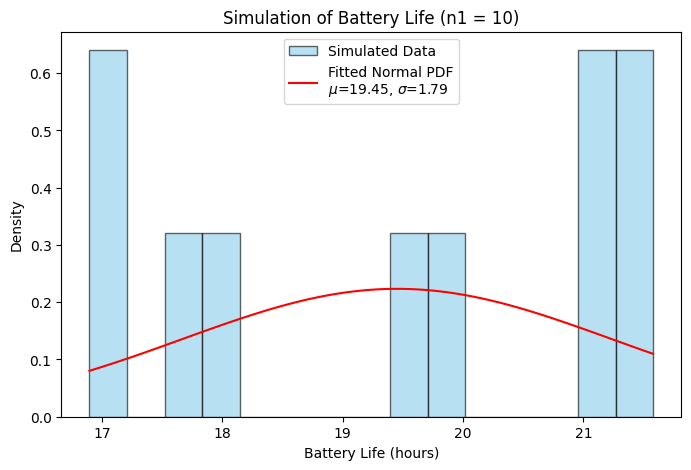

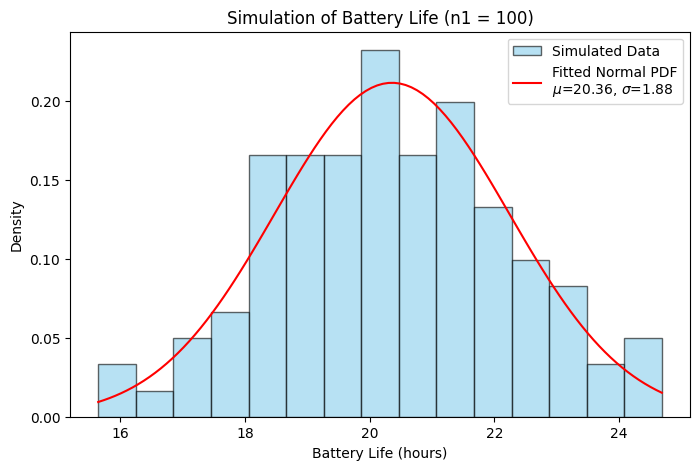

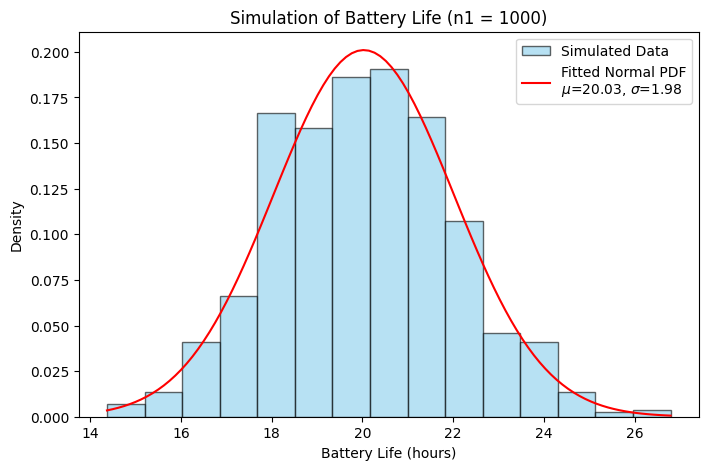

(np.float64(20.029526408838166), np.float64(1.9848737271474495))

In [ ]:
simulate_and_mle(10)
simulate_and_mle(100)
simulate_and_mle(1000)


Question 1(ii)

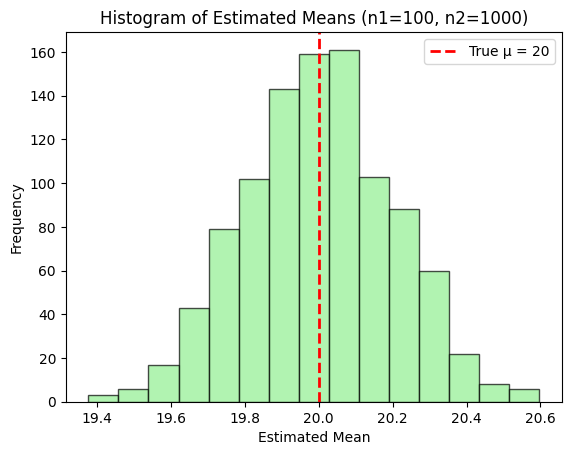

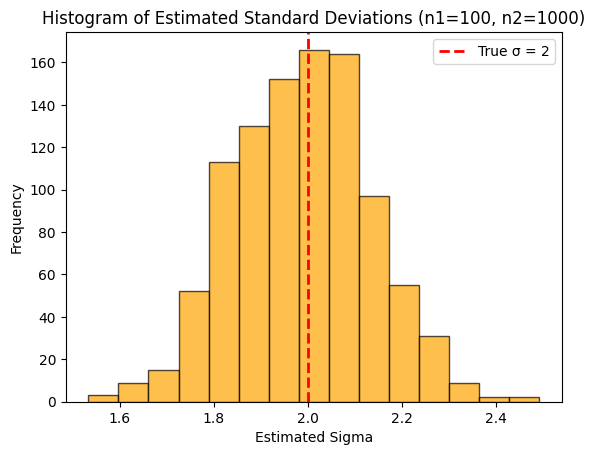

(np.float64(20.000306937226178), np.float64(1.9876750631076638))

In [ ]:
def repeated_simulation(n1, n2, true_mu=20, true_sigma=2):
    estimated_means = []
    estimated_sigmas = []

    for _ in range(n2):
        data = np.random.normal(loc=true_mu, scale=true_sigma, size=n1)
        mle_mu = np.mean(data)
        mle_sigma = np.std(data, ddof=0)  # MLE uses ddof=0
        estimated_means.append(mle_mu)
        estimated_sigmas.append(mle_sigma)

    # Plot histogram of estimated means
    plt.hist(estimated_means, bins=15, color='lightgreen', edgecolor='black', alpha=0.7)
    plt.axvline(true_mu, color='red', linestyle='dashed', linewidth=2, label=f'True μ = {true_mu}')
    plt.title(f"Histogram of Estimated Means (n1={n1}, n2={n2})")
    plt.xlabel("Estimated Mean")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Plot histogram of estimated sigmas
    plt.hist(estimated_sigmas, bins=15, color='orange', edgecolor='black', alpha=0.7)
    plt.axvline(true_sigma, color='red', linestyle='dashed', linewidth=2, label=f'True σ = {true_sigma}')
    plt.title(f"Histogram of Estimated Standard Deviations (n1={n1}, n2={n2})")
    plt.xlabel("Estimated Sigma")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Return for further analysis if needed
    return np.mean(estimated_means), np.mean(estimated_sigmas)

# Example usage:
repeated_simulation(n1=100, n2=1000)


Question 2


Running simulation for n1 = 10


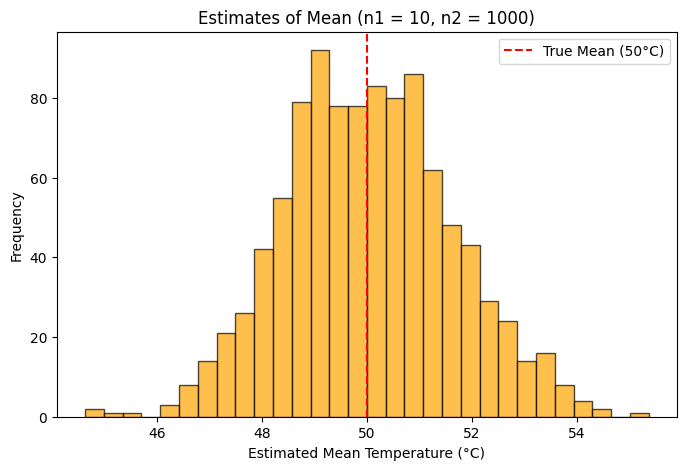

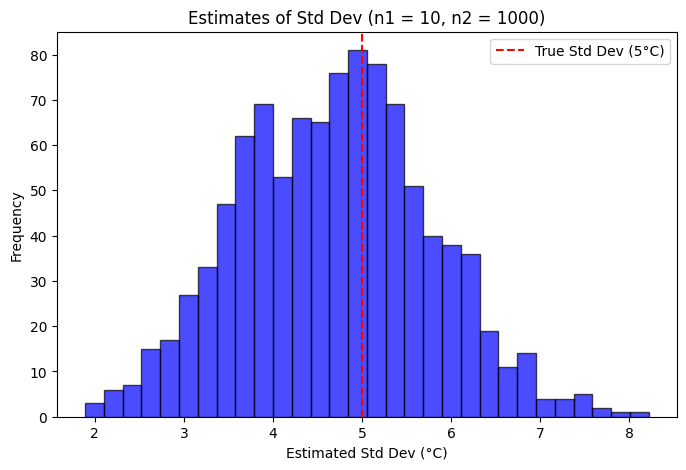


Running simulation for n1 = 100


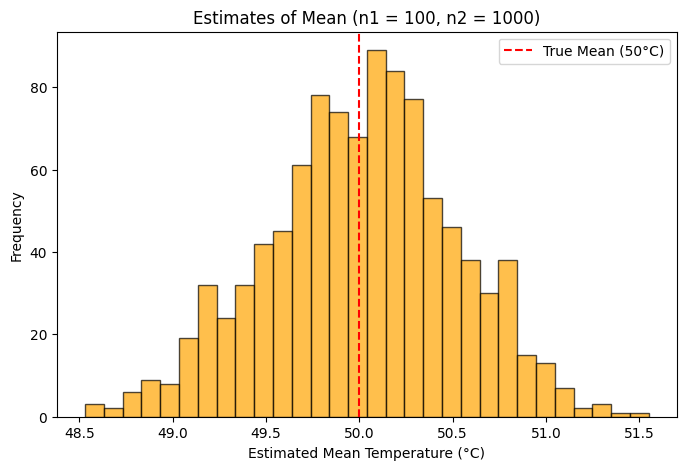

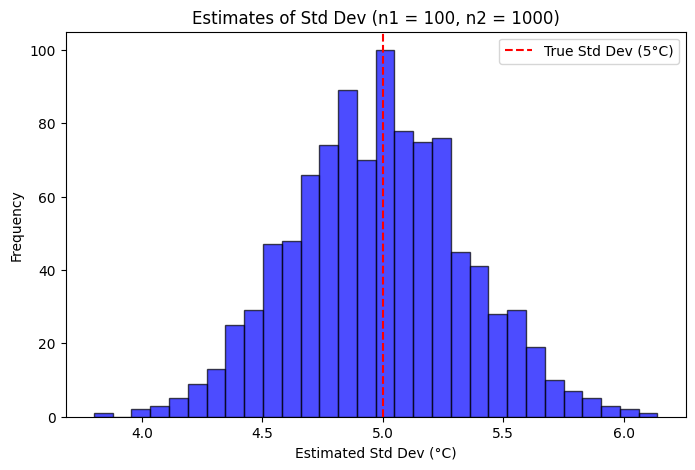


Running simulation for n1 = 1000


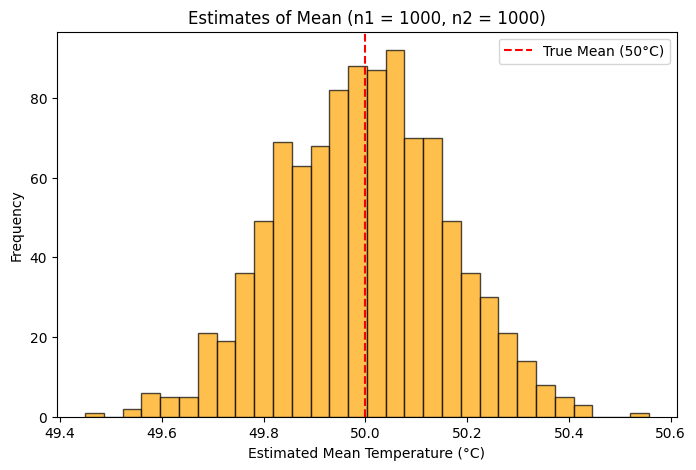

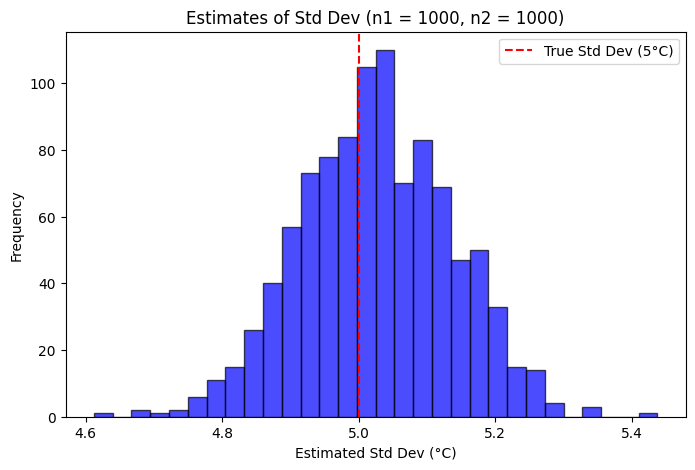

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# True parameters
mu_true = 50
sigma_true = 5
noise_var = (2**2) / 12  # Variance of Uniform(-1, 1)

# Experiment settings
n1_values = [10, 100, 1000]  # Sample sizes
n2 = 1000  # Number of repetitions

for n1 in n1_values:
    print(f"\nRunning simulation for n1 = {n1}")
    mu_estimates = []
    sigma_estimates = []

    for _ in range(n2):
        # Simulate true temperature
        X = np.random.normal(mu_true, sigma_true, n1)
        # Simulate sensor noise
        eta = np.random.uniform(-1, 1, n1)
        # Measured temperature
        Y = X + eta
        # MLE estimates (sample mean and sample std with ddof=0)
        mu_estimates.append(np.mean(Y))
        sigma_estimates.append(np.std(Y, ddof=0))

    # ---- Plot Histogram of Estimated Means ----
    plt.figure(figsize=(8, 5))
    plt.hist(mu_estimates, bins=30, color='orange', alpha=0.7, edgecolor='black')
    plt.axvline(mu_true, color='red', linestyle='dashed', label='True Mean (50°C)')
    plt.title(f'Estimates of Mean (n1 = {n1}, n2 = {n2})')
    plt.xlabel('Estimated Mean Temperature (°C)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # ---- Plot Histogram of Estimated Std Dev ----
    plt.figure(figsize=(8, 5))
    plt.hist(sigma_estimates, bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.axvline(sigma_true, color='red', linestyle='dashed', label='True Std Dev (5°C)')
    plt.title(f'Estimates of Std Dev (n1 = {n1}, n2 = {n2})')
    plt.xlabel('Estimated Std Dev (°C)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()



Running simulation for n1 = 10
Mean Bias: 0.0134, Variability (std): 1.5770
Std Dev Bias: -0.3622, Variability (std): 1.1230


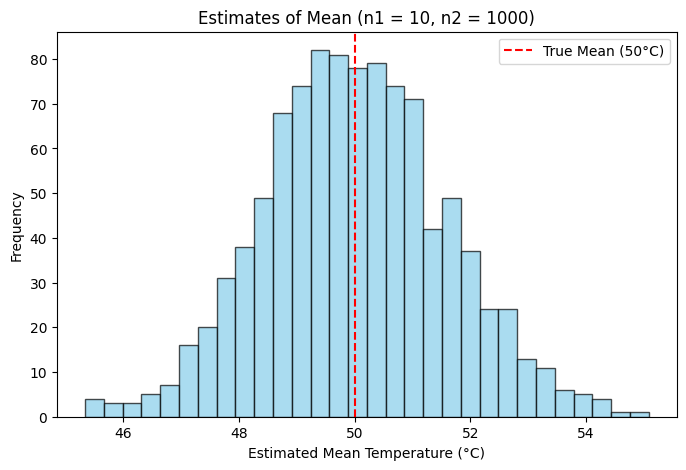

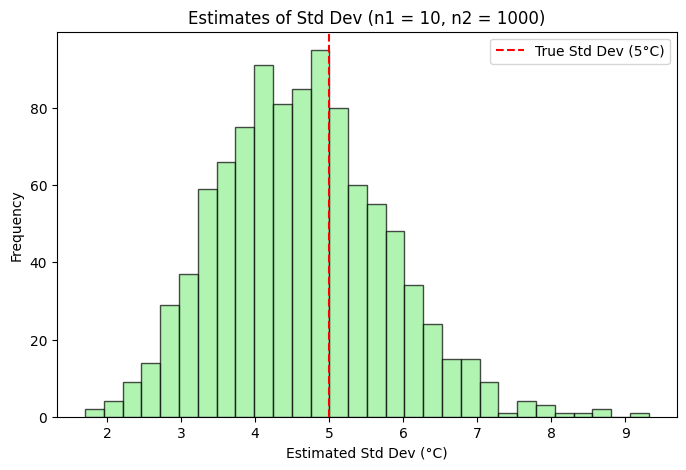


Running simulation for n1 = 100
Mean Bias: 0.0053, Variability (std): 0.4911
Std Dev Bias: 0.0085, Variability (std): 0.3466


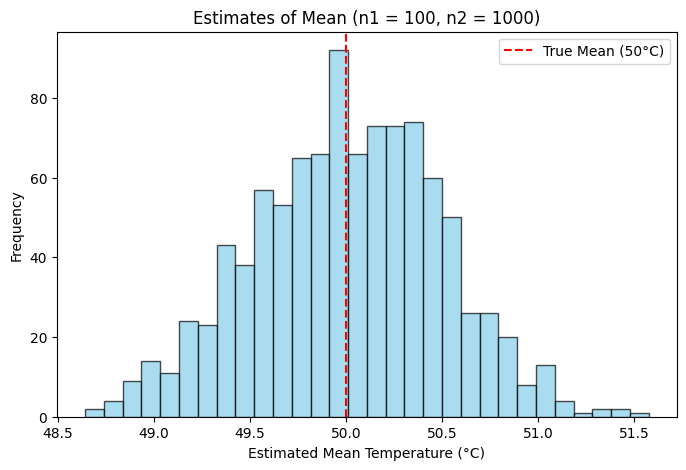

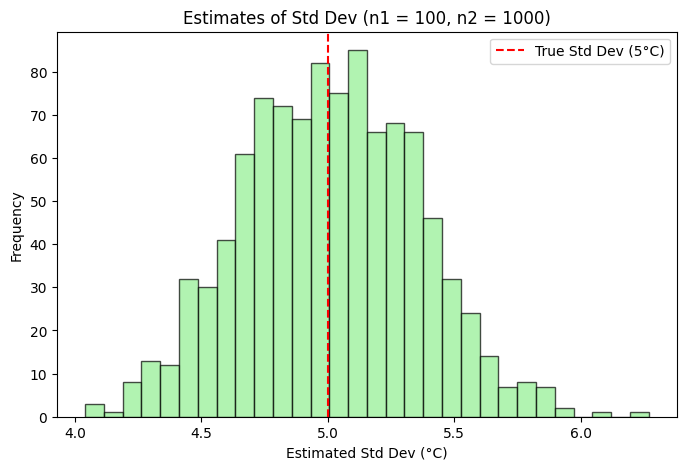


Running simulation for n1 = 1000
Mean Bias: -0.0001, Variability (std): 0.1638
Std Dev Bias: 0.0338, Variability (std): 0.1160


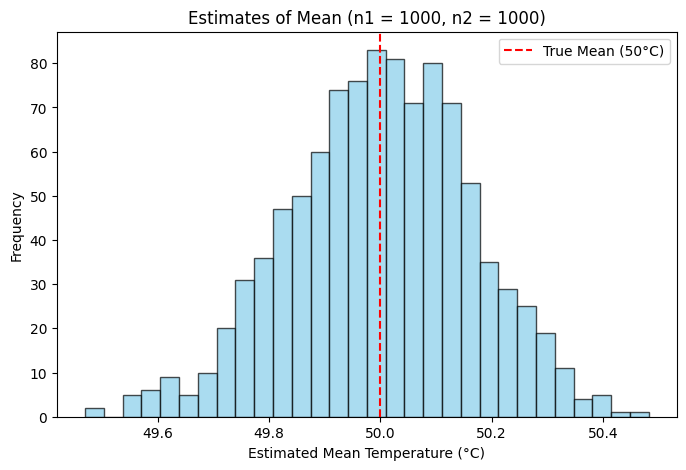

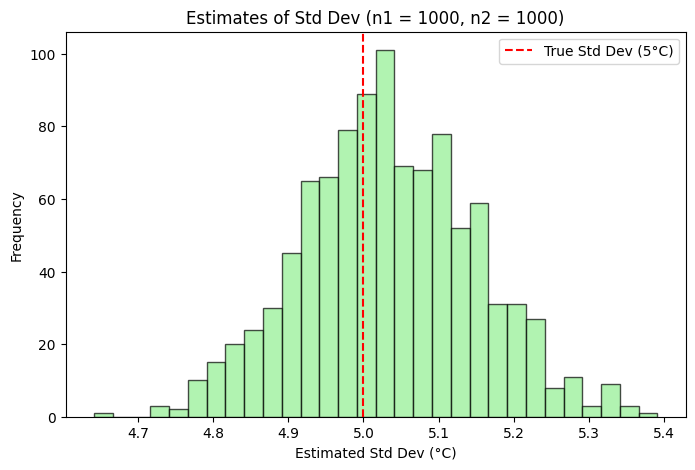

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to simulate one experiment
def simulate_temperature_mle(n1, true_mu=50, true_sigma=5):
    # Simulate true temperatures (Normal distribution)
    X = np.random.normal(loc=true_mu, scale=true_sigma, size=n1)

    # Add sensor noise (Uniform distribution between -1 and 1)
    noise = np.random.uniform(low=-1, high=1, size=n1)
    Y = X + noise  # Measured temperatures

    # MLE estimates from noisy measurements
    mu_hat = np.mean(Y)
    sigma_hat = np.std(Y, ddof=0)  # MLE uses ddof=0

    # Plot the histogram with fitted Normal PDF
    plt.figure(figsize=(8, 5))
    count, bins, _ = plt.hist(Y, bins=15, density=True, alpha=0.6, color='lightgreen', edgecolor='black', label='Noisy Measurements')
    x = np.linspace(min(bins), max(bins), 100)
    plt.plot(x, norm.pdf(x, mu_hat, sigma_hat), 'r-', label=f'Fitted Normal PDF\n$\\mu$={mu_hat:.2f}, $\\sigma$={sigma_hat:.2f}')
    plt.title(f'Temperature Measurement Simulation (n1 = {n1})')
    plt.xlabel('Measured Temperature (°C)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    return mu_hat, sigma_hat

# Example for different n1 values
for n1 in [10, 100, 1000]:
    simulate_temperature_mle(n1)

# Part (ii): Repeated simulation to observe bias and variability
def repeat_simulation(n1, n2, true_mu=50, true_sigma=5):
    mu_estimates = []
    sigma_estimates = []

    for _ in range(n2):
        mu_hat, sigma_hat = simulate_temperature_mle_single(n1, true_mu, true_sigma)
        mu_estimates.append(mu_hat)
        sigma_estimates.append(sigma_hat)

    # Plot histogram of mu estimates
    plt.figure(figsize=(8, 5))
    plt.hist(mu_estimates, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(x=true_mu, color='red', linestyle='--', label=f'True μ = {true_mu}')
    plt.title(f'Histogram of Estimated Means (n1={n1}, n2={n2})')
    plt.xlabel('Estimated Mean (°C)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Plot histogram of sigma estimates
    plt.figure(figsize=(8, 5))
    plt.hist(sigma_estimates, bins=15, color='orange', edgecolor='black', alpha=0.7)
    plt.axvline(x=true_sigma, color='red', linestyle='--', label=f'True σ = {true_sigma}')
    plt.title(f'Histogram of Estimated Std Deviations (n1={n1}, n2={n2})')
    plt.xlabel('Estimated Std Deviation (°C)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    print(f"Mean of estimated μ: {np.mean(mu_estimates):.3f}")
    print(f"Mean of estimated σ: {np.mean(sigma_estimates):.3f}")

# Helper function for single run without plot (used in repetition)
def simulate_temperature_mle_single(n1, true_mu=50, true_sigma=5):
    X = np.random.normal(loc=true_mu, scale=true_sigma, size=n1)
    noise = np.random.uniform(low=-1, high=1, size=n1)
    Y = X + noise
    mu_hat = np.mean(Y)
    sigma_hat = np.std(Y, ddof=0)
    return mu_hat, sigma_hat

# Run repeated simulation for bias and variability check
n2 = 1000
repeat_simulation(n1=10, n2=n2)
repeat_simulation(n1=100, n2=n2)
repeat_simulation(n1=1000, n2=n2)



===== Sample Size n1 = 10 =====


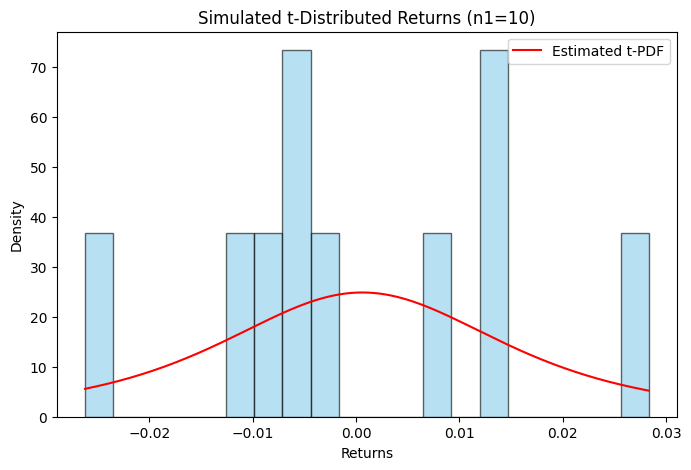

Part (i) - MLE Mean: 0.00059, MLE Std Dev: 0.01465


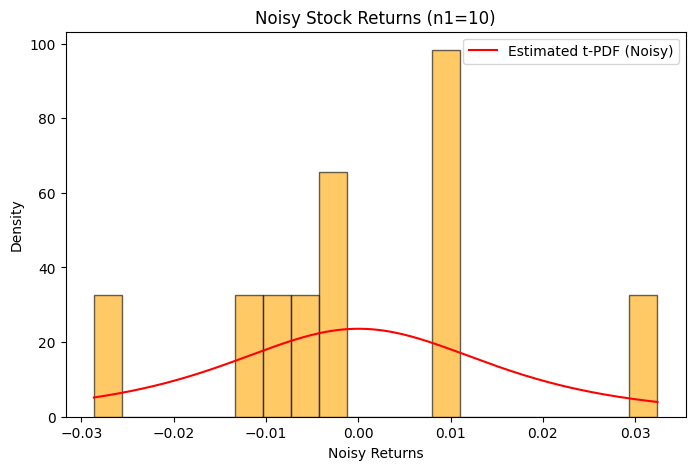

Part (ii) - Noisy MLE Mean: 0.00003, Noisy MLE Std Dev: 0.01544

===== Sample Size n1 = 100 =====


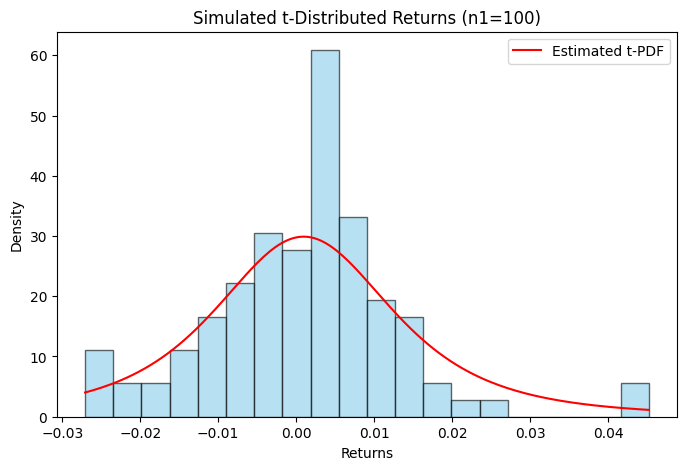

Part (i) - MLE Mean: 0.00096, MLE Std Dev: 0.01217


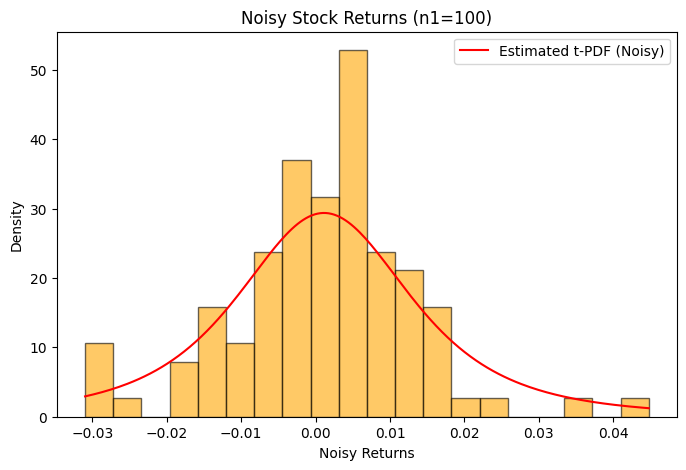

Part (ii) - Noisy MLE Mean: 0.00114, Noisy MLE Std Dev: 0.01240

===== Sample Size n1 = 1000 =====


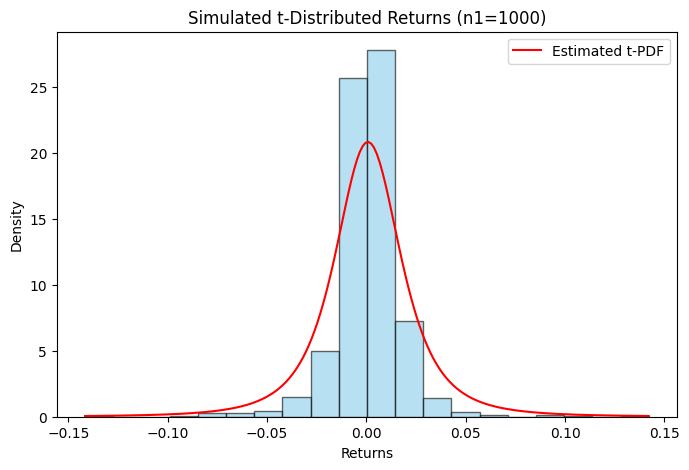

Part (i) - MLE Mean: 0.00079, MLE Std Dev: 0.01748


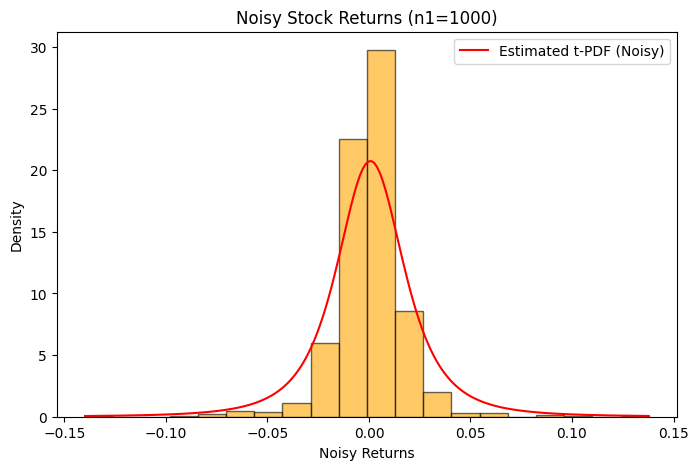

Part (ii) - Noisy MLE Mean: 0.00071, Noisy MLE Std Dev: 0.01754


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

def simulate_t_distribution(n1, df, true_mu, true_sigma):
    """
    Simulate t-distributed stock returns and perform MLE estimation
    """
    t_samples = stats.t.rvs(df=df, size=n1)
    t_scaled = true_mu + true_sigma * t_samples / np.sqrt(df / (df - 2))

    mle_mu = np.mean(t_scaled)
    mle_sigma = np.std(t_scaled, ddof=0)

    # Plot histogram with t-distribution overlay
    plt.figure(figsize=(8, 5))
    plt.hist(t_scaled, bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')

    x = np.linspace(min(t_scaled), max(t_scaled), 200)
    t_pdf = stats.t.pdf((x - mle_mu) / mle_sigma, df=df) / mle_sigma
    plt.plot(x, t_pdf, 'r-', label='Estimated t-PDF')

    plt.title(f"Simulated t-Distributed Returns (n1={n1})")
    plt.xlabel("Returns")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    return mle_mu, mle_sigma, t_scaled

def simulate_with_market_noise(t_scaled, df):
    """
    Add uniform market noise and recompute MLE
    """
    eta = np.random.uniform(-0.005, 0.005, size=len(t_scaled))
    noisy_returns = t_scaled + eta

    noisy_mle_mu = np.mean(noisy_returns)
    noisy_mle_sigma = np.std(noisy_returns, ddof=0)

    # Plot histogram of noisy returns with t-distribution overlay
    plt.figure(figsize=(8, 5))
    plt.hist(noisy_returns, bins=20, density=True, alpha=0.6, color='orange', edgecolor='black')

    x = np.linspace(min(noisy_returns), max(noisy_returns), 200)
    noisy_t_pdf = stats.t.pdf((x - noisy_mle_mu) / noisy_mle_sigma, df=df) / noisy_mle_sigma
    plt.plot(x, noisy_t_pdf, 'r-', label='Estimated t-PDF (Noisy)')

    plt.title(f"Noisy Stock Returns (n1={len(t_scaled)})")
    plt.xlabel("Noisy Returns")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    return noisy_mle_mu, noisy_mle_sigma
n1_list = [10, 100, 1000]
df = 5
true_mu = 0.001
true_sigma = 0.02
for n1 in n1_list:
    print(f"\n===== Sample Size n1 = {n1} =====")
    mle_mu, mle_sigma, t_scaled = simulate_t_distribution(n1, df, true_mu, true_sigma)
    print(f"Part (i) - MLE Mean: {mle_mu:.5f}, MLE Std Dev: {mle_sigma:.5f}")

    noisy_mle_mu, noisy_mle_sigma = simulate_with_market_noise(t_scaled, df)
    print(f"Part (ii) - Noisy MLE Mean: {noisy_mle_mu:.5f}, Noisy MLE Std Dev: {noisy_mle_sigma:.5f}")
